# BEGINNERS GUIDE TO MUSHROOMS DATASET FROM KAGGLE

First we are going to do our imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Let's read our data

In [3]:
data = pd.read_csv('mushrooms_data.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now we want to seperate our features(X) and label(y). Label is going to be the "class" column.
(Remember 'p' stands for 'poisonous' and 'e' stands for 'edible')

In [4]:
X = data.drop('class', axis=1)
y = data['class']

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

To train our model we have to change column values to numbers. We can do that by calling the
get_dummies() method from pandas. This will do turn our data to one-hot encoding. To learn more
about one-hot encoding: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [6]:
X_encoded = pd.get_dummies(X)
X_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


We are going to use LabelEncoder() method from sklearn to get a numpy array of labels.

In [7]:
y_encoded = LabelEncoder().fit_transform(y)
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

Now we want to scale our features with StandardScaler() method from sklearn to get better performance. This will turn our values into a numpy array

In [8]:
X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

# Splitting our data to X_train, y_train, X_test, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.33)
# test_size 0.33 means that we are going to train our model with 67% of the data
# and test with the rest of the data.

# Let's train our model without using feature selection

We are going to compare the model with and without feature selection. Now let's look at the model without feature selection and let's evaluate it.


We are going to use RandomForestClassifier for this dataset. You can experiment with other 
algorithms and compare their results.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time

start = time.process_time()
# Let's train our model
model = RandomForestClassifier(n_estimators = 500)
model = model.fit(X_train, y_train)
print('This model took {} seconds to train'.format(time.process_time() - start))

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

This model took 1.453125 seconds to train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1399
           1       1.00      1.00      1.00      1282

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Great! We got 100% accuracy which means our model predicted all of the labels correctly.
But it took 1.45 seconds to run. This wouldn't be a problem for small datasets like this but we
have to use some feature engineering techniques to run our model faster with close results to 100%

# Using Feature Selection

Let's look at the most important features of our data

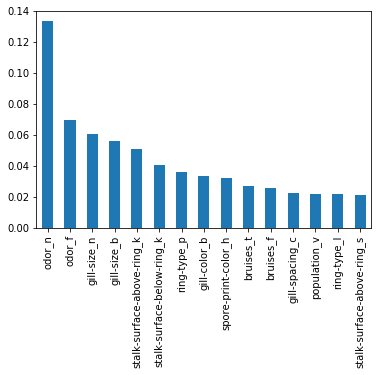

In [42]:
important_feat = pd.Series(model.feature_importances_, index = X_encoded.columns)
important_feat.nlargest(15).plot(kind = 'bar') # Plots 15 of our most important features

We want to only use some of the features to speed up training. So we will train our model with 
the most important 6 features. This number is arbitrary, you can tune its value.

In [43]:
best_feat = important_feat.nlargest(6).index
best_feat

Index(['odor_n', 'odor_f', 'gill-size_n', 'gill-size_b',
       'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k'],
      dtype='object')

We will now create new train and test sets with only 6 features instead of 117 columns we previously used to train our model.

In [44]:
X_important = X_encoded[best_feat]
Xi_scaled = StandardScaler().fit_transform(X_important)

Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi_scaled, y_encoded, test_size = 0.33)

# Training our model with only 6 features

In [45]:
start = time.process_time()
imodel = RandomForestClassifier(n_estimators= 500)
imodel = imodel.fit(Xi_train, yi_train)
print('This model took {} seconds to train'.format(time.process_time() - start))
ipredictions = imodel.predict(Xi_test)
print(classification_report(yi_test, ipredictions))

This model took 0.890625 seconds to train
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1386
           1       0.97      0.97      0.97      1295

    accuracy                           0.97      2681
   macro avg       0.97      0.97      0.97      2681
weighted avg       0.97      0.97      0.97      2681



This model took only 0.89 seconds to train whereas our former model took 1.45 seconds to run. Which is more than 1.5 times faster. Although our model is faster to train, we see that we couldn't reach the 100% accuracy we reached in the former model.

# SUMMARY

Data Scientists face this trade-off between the performance of the model and the time it takes to train the model. In much larger datasets in real-world, being 1.5 times faster can save us days or maybe even weeks. So, if you are willing to sacrifice a little bit of your model's accuracy to train your model much faster, you can try feature selection. 